# Description
## This notebok provides set of commands to install Spark NLP for offline usage. It contains 4 sections:

0) Initial setup

1) Download all dependencies for Spark NLP

2) Download all dependencies for Spark NLP (enterprise/licensed)

3) Download all dependencies for Spark NLP OCR

4) Download all models/embeddings for offline usage

    4-1) Download public models with wget shell command \
    4-2) Download licensed models via boto3 \
    4-3) Download licensed models via ResourcceDownloader / InternalResourceDownloader methods \ 
    
       
`p.s: This notebook runned succesfully in:`

               `Distributor ID: Ubuntu  
                Description:    Ubuntu 22.04.3 LTS  
                Release:        22.04`  
                


## 0) Initial setup

In [1]:
# load and point the licence_keys as 'spark_jsl.json' file

import json, os

with open('spark_jsl.json') as f:
    license_keys = json.load(f)


locals().update(license_keys)
os.environ.update(license_keys)
license_keys.keys()



dict_keys(['SPARK_NLP_LICENSE', 'SECRET', 'JSL_VERSION', 'SPARK_OCR_LICENSE', 'SPARK_OCR_SECRET', 'OCR_VERSION', 'PUBLIC_VERSION', 'AWS_ACCESS_KEY_ID', 'AWS_SECRET_ACCESS_KEY'])

In [3]:
! sudo apt-get update -qq

In [5]:
# installing JAVA

! sudo apt-get install -y openjdk-8-jdk-headless -qq > /dev/null

Scanning processes...                                                           
Scanning candidates...                                                          
Scanning linux images...                                                        

Running kernel seems to be up-to-date.

Restarting services...


In [2]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["PATH"] = os.environ["JAVA_HOME"] + "/bin:" + os.environ["PATH"]
!java -version

openjdk version "1.8.0_392"
OpenJDK Runtime Environment (build 1.8.0_392-8u392-ga-1~22.04-b08)
OpenJDK 64-Bit Server VM (build 25.392-b08, mixed mode)


In [3]:
print(os.environ["JAVA_HOME"])

/usr/lib/jvm/java-8-openjdk-amd64


In [4]:
!pip install --upgrade -q pyspark==3.4.1

In [4]:
!pip list | grep spark

pyspark                3.4.1


In [ ]:
! curl "https://awscli.amazonaws.com/awscli-exe-linux-x86_64.zip" -o "awscliv2.zip"
! unzip awscliv2.zip  # sudo apt install unzip if not installed
! sudo ./aws/install

## 1) Download all dependencies for Spark NLP

In [8]:
# spark-nlp jar
!sudo wget  https://s3.amazonaws.com/auxdata.johnsnowlabs.com/public/jars/spark-nlp-assembly-$PUBLIC_VERSION.jar -P /usr/lib/spark/jars/

--2023-12-30 18:14:16--  https://s3.amazonaws.com/auxdata.johnsnowlabs.com/public/jars/spark-nlp-assembly-5.2.0.jar
Resolving s3.amazonaws.com (s3.amazonaws.com)... 16.182.38.160, 52.216.9.101, 52.216.93.221, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|16.182.38.160|:443... connected.
HTTP request sent, awaiting response... 

200 OK
Length: 722128385 (689M) [application/java-archive]
Saving to: ‘/usr/lib/spark/jars/spark-nlp-assembly-5.2.0.jar’

spark-nlp-assembly- 100%[===================>] 688.67M  35.5MB/s    in 19s     

2023-12-30 18:14:36 (35.5 MB/s) - ‘/usr/lib/spark/jars/spark-nlp-assembly-5.2.0.jar’ saved [722128385/722128385]



In [11]:
# spark-nlp wheel
! pip install spark-nlp==$PUBLIC_VERSION

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 548.5/548.5 KB 7.6 MB/s eta 0:00:0000:0100:01


In [12]:
!pip list | grep spark

pyspark                3.4.1
spark-nlp              5.2.0


## 2) Download all dependencies for Spark NLP (enterprise/licensed)

In [13]:
# spark nlp JSL JAR
!sudo wget https://s3.eu-west-1.amazonaws.com/pypi.johnsnowlabs.com/$SECRET/spark-nlp-jsl-$JSL_VERSION.jar -P /usr/lib/spark/jars/

--2023-12-30 18:38:58--  https://s3.eu-west-1.amazonaws.com/pypi.johnsnowlabs.com/5.2.0-b05bf6cf9656ef4a0fe918a037481a8ef7245fcb/spark-nlp-jsl-5.2.0.jar
Resolving s3.eu-west-1.amazonaws.com (s3.eu-west-1.amazonaws.com)... 52.92.19.224, 52.92.4.16, 52.218.56.11, ...
Connecting to s3.eu-west-1.amazonaws.com (s3.eu-west-1.amazonaws.com)|52.92.19.224|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40061499 (38M) [application/octet-stream]
Saving to: ‘/usr/lib/spark/jars/spark-nlp-jsl-5.2.0.jar’

spark-nlp-jsl-5.2.0 100%[===================>]  38.21M  19.2MB/s    in 2.0s    

2023-12-30 18:39:00 (19.2 MB/s) - ‘/usr/lib/spark/jars/spark-nlp-jsl-5.2.0.jar’ saved [40061499/40061499]



In [15]:
# park nlp JSL wheel
! sudo wget https://s3.eu-west-1.amazonaws.com/pypi.johnsnowlabs.com/$SECRET/spark-nlp-jsl/spark_nlp_jsl-$JSL_VERSION-py3-none-any.whl -P /usr/lib/spark/jars/

--2023-12-30 18:41:09--  https://s3.eu-west-1.amazonaws.com/pypi.johnsnowlabs.com/5.2.0-b05bf6cf9656ef4a0fe918a037481a8ef7245fcb/spark-nlp-jsl/spark_nlp_jsl-5.2.0-py3-none-any.whl
Resolving s3.eu-west-1.amazonaws.com (s3.eu-west-1.amazonaws.com)... 52.218.90.59, 52.218.36.218, 52.92.17.144, ...
Connecting to s3.eu-west-1.amazonaws.com (s3.eu-west-1.amazonaws.com)|52.218.90.59|:443... 

connected.
HTTP request sent, awaiting response... 200 OK
Length: 473226 (462K) [application/x-gzip]
Saving to: ‘/usr/lib/spark/jars/spark_nlp_jsl-5.2.0-py3-none-any.whl’

spark_nlp_jsl-5.2.0 100%[===================>] 462.13K  1.66MB/s    in 0.3s    

2023-12-30 18:41:10 (1.66 MB/s) - ‘/usr/lib/spark/jars/spark_nlp_jsl-5.2.0-py3-none-any.whl’ saved [473226/473226]



In [6]:
!pip install -q /usr/lib/spark/jars/spark_nlp_jsl-$JSL_VERSION-py3-none-any.whl

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spark-ocr 5.1.2 requires spark-nlp==5.1.2, but you have spark-nlp 5.1.1 which is incompatible.


In [17]:
!pip list | grep spark

pyspark                3.4.1
spark-nlp              5.2.0
spark-nlp-jsl          5.2.0


## 3) Download all dependencies for Spark NLP OCR

`note: if you do not have Johnsnowlabs SparkOCR license, skip this part`

In [18]:
# spark ocr JAR
!sudo wget -q https://s3.eu-west-1.amazonaws.com/pypi.johnsnowlabs.com/$SPARK_OCR_SECRET/jars/spark-ocr-assembly-$OCR_VERSION.jar -P /usr/lib/spark/jars/

#spark ocr wheel
!sudo wget -q https://s3.eu-west-1.amazonaws.com/pypi.johnsnowlabs.com/$SPARK_OCR_SECRET/spark-ocr/spark_ocr-$OCR_VERSION-py3-none-any.whl -P /usr/lib/spark/jars/

In [19]:
!ls -l /usr/lib/spark/jars/

total 1231488
-rw-r--r-- 1 root root 722128385 Dec  8 21:21 spark-nlp-assembly-5.2.0.jar
-rw-r--r-- 1 root root  40061499 Dec 23 21:13 spark-nlp-jsl-5.2.0.jar
-rw-r--r-- 1 root root 457626988 Nov 17 16:50 spark-ocr-assembly-5.1.0.jar
-rw-r--r-- 1 root root    473226 Dec 23 21:13 spark_nlp_jsl-5.2.0-py3-none-any.whl
-rw-r--r-- 1 root root  40736607 Nov 17 16:50 spark_ocr-5.1.0-py3-none-any.whl


In [20]:
!pip install -q /usr/lib/spark/jars/spark_ocr-$OCR_VERSION-py3-none-any.whl

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spark-nlp-jsl 5.2.0 requires spark-nlp==5.2.0, but you have spark-nlp 5.1.2 which is incompatible.


In [ ]:
# to fix version incompatibility run below again

# pip install spark-nlp==$PUBLIC_VERSION

In [12]:
#sanity check
!pip list | grep spark

pyspark                3.4.0
spark-nlp              5.2.0
spark-nlp-jsl          5.2.0
spark-ocr              5.1.0


`Installation done. Let's download the models...`

## 4) Download all models/embeddings for offline usage

### Downloading Public Models simply by wget shell command

In [22]:
!mkdir models

In [8]:
!sudo wget  -P models/ https://s3.amazonaws.com/auxdata.johnsnowlabs.com/public/models/ner_dl_en_2.4.3_2.4_1584624950746.zip 
!sudo wget  -P models/ https://s3.amazonaws.com/auxdata.johnsnowlabs.com/public/models/glove_100d_en_2.4.0_2.4_1579690104032.zip

--2023-12-30 19:42:15--  https://s3.amazonaws.com/auxdata.johnsnowlabs.com/public/models/glove_100d_en_2.4.0_2.4_1579690104032.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 54.231.168.0, 54.231.226.88, 52.217.229.184, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|54.231.168.0|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 152394105 (145M) [application/zip]
Saving to: ‘models/glove_100d_en_2.4.0_2.4_1579690104032.zip’

glove_100d_en_2.4.0 100%[===================>] 145.33M   104MB/s    in 1.4s    

2023-12-30 19:42:16 (104 MB/s) - ‘models/glove_100d_en_2.4.0_2.4_1579690104032.zip’ saved [152394105/152394105]



In [9]:
!unzip -q models/ner_dl_en_2.4.3_2.4_1584624950746.zip -d ner_dl_glove/

In [10]:
!unzip -q models/glove_100d_en_2.4.0_2.4_1579690104032.zip -d glove_embeddings/

In [8]:
ner_local_path = 'ner_dl_glove'
embeddings_local_path = 'glove_embeddings'

In [4]:
import json
import os
from pyspark.ml import Pipeline
from pyspark.sql import SparkSession

from sparknlp.annotator import *
from sparknlp_jsl.annotator import *
from sparknlp.base import *
import sparknlp_jsl

In [ ]:
import sparkocr
from sparkocr import start
from sparkocr.transformers import *
from sparkocr.enums import *
from sparkocr.utils import *
from sparkocr.metrics import score

In [17]:
!ls -l /usr/lib/spark/jars/

total 1231488
-rw-r--r-- 1 root root 722128385 Dec  8 21:21 spark-nlp-assembly-5.2.0.jar
-rw-r--r-- 1 root root  40061499 Dec 23 21:13 spark-nlp-jsl-5.2.0.jar
-rw-r--r-- 1 root root 457626988 Nov 17 16:50 spark-ocr-assembly-5.1.0.jar
-rw-r--r-- 1 root root    473226 Dec 23 21:13 spark_nlp_jsl-5.2.0-py3-none-any.whl
-rw-r--r-- 1 root root  40736607 Nov 17 16:50 spark_ocr-5.1.0-py3-none-any.whl


In [ ]:
def start():
    builder = SparkSession.builder \
        .appName("Spark NLP Licensed") \
        .master("local[*]") \
        .config("spark.driver.memory", "10G") \
        .config("spark.serializer", "org.apache.spark.serializer.KryoSerializer") \
        .config("spark.kryoserializer.buffer.max", "2000M")\
        .config("spark.sql.legacy.allowUntypedScalaUDF", "true")\
        .config("spark.jars", f"/usr/lib/spark/jars/spark-nlp-assembly-{PUBLIC_VERSION}.jar, /usr/lib/spark/jars/spark-nlp-jsl-{JSL_VERSION}.jar")
    return builder.getOrCreate()

spark = start()

`To start a spark session with licensed SparkOCR modul:`

```def start():
    builder = SparkSession.builder \
        .appName("Spark NLP Licensed") \
        .master("local[*]") \
        .config("spark.driver.memory", "10G") \
        .config("spark.serializer", "org.apache.spark.serializer.KryoSerializer") \
        .config("spark.kryoserializer.buffer.max", "2000M")\
        .config("spark.sql.legacy.allowUntypedScalaUDF", "true")\
            .config("spark.jars", f"/usr/lib/spark/jars/spark-nlp-assembly-{PUBLIC_VERSION}.jar, /usr/lib/spark/jars/spark-nlp-jsl-{JSL_VERSION}.jar, /usr/lib/spark/jars/spark-ocr-assembly-{OCR_VERSION}.jar")
    return builder.getOrCreate()

spark = start()```

In [19]:
spark.sparkContext.setLogLevel("error")


In [ ]:
documentAssembler = DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")

tokenizer = Tokenizer() \
    .setInputCols(["document"]) \
    .setOutputCol("token")

# ner_dl model is trained with glove_100d. So we use the same embeddings in the pipeline
glove_embeddings = WordEmbeddingsModel.load(embeddings_local_path).\
  setInputCols(["document", 'token']).\
  setOutputCol("embeddings")

# NER model trained on i2b2 (sampled from MIMIC) dataset
public_ner = NerDLModel.load(ner_local_path) \
  .setInputCols(["document", "token", "embeddings"]) \
  .setOutputCol("ner")

nlpPipeline = Pipeline(stages=[
 documentAssembler, 
 tokenizer,
 glove_embeddings,
 public_ner
 ])

empty_df = spark.createDataFrame([['']]).toDF("text")

pipelineModel = nlpPipeline.fit(empty_df)

In [12]:
df = spark.createDataFrame([['Peter Parker lives in New York.']]).toDF("text")

result = pipelineModel.transform(df)

result.select('token.result','ner.result').show(truncate=False)

+----------------------------------------+-------------------------------------+
|result                                  |result                               |
+----------------------------------------+-------------------------------------+
|[Peter, Parker, lives, in, New, York, .]|[B-PER, I-PER, O, O, B-LOC, I-LOC, O]|
+----------------------------------------+-------------------------------------+



In [13]:
light_model = LightPipeline(pipelineModel)

text = 'Peter Parker lives in New York.'

light_result = light_model.annotate(text)

list(zip(light_result['token'], light_result['ner']))

[('Peter', 'B-PER'),
 ('Parker', 'I-PER'),
 ('lives', 'O'),
 ('in', 'O'),
 ('New', 'B-LOC'),
 ('York', 'I-LOC'),
 ('.', 'O')]

## Downloading Licensed model via Boto3

In [15]:
import shutil
import boto3

# Add your credentials 
ACCESS_KEY = AWS_ACCESS_KEY_ID
SECRET_KEY = AWS_SECRET_ACCESS_KEY

# Connect
s3 = boto3.resource('s3', aws_access_key_id=ACCESS_KEY, aws_secret_access_key=SECRET_KEY)
buck_auxdata = s3.Bucket('auxdata.johnsnowlabs.com')

In [ ]:
ACCESS_KEY, SECRET_KEY

In [17]:
!mkdir zip_files

`List all models and retrieve the required model name & model link`

In [ ]:
from sparknlp.pretrained import ResourceDownloader
ResourceDownloader.clearCache("ner_jsl","en","clinical/models")

In [78]:
from sparknlp_jsl.compatibility import Compatibility

compatibility = Compatibility(spark)

term = 'ner_oncology'
models = compatibility.findVersion(term)

print(f"There are {len(models)} {term} related models" ,"\n", models[0])

There are 137 ner_oncology related models 
 {'name': 'ner_oncology_wip', 'sparkVersion': '3.0', 'version': '3.5.0', 'language': 'en', 'date': '2022-07-25T17:48:26.053', 'readyToUse': 'true'}


In [81]:
# list of all models

!wget https://nlp.johnsnowlabs.com/models.json
 
import json
 
with open ("models.json", "r", encoding="utf-8") as f:
  full_list = json.load(f)
import pandas as pd

df = pd.DataFrame(full_list)
pd.set_option('display.max_colwidth', 150)
df[["name","download_link"]].head()


,name,download_link
0,pos_clinical,https://s3.amazonaws.com/auxdata.johnsnowlabs.com/clinical/models/pos_clinical_en_2.0.2_2.4_1556660550177.zip
1,deidentify_rb,https://s3.amazonaws.com/auxdata.johnsnowlabs.com/clinical/models/deidentify_rb_en_2.0.2_2.4_1559672122511.zip
2,embeddings_clinical,https://s3.amazonaws.com/auxdata.johnsnowlabs.com/clinical/models/embeddings_clinical_en_2.4.0_2.4_1580237286004.zip
3,ner_crf,https://s3.amazonaws.com/auxdata.johnsnowlabs.com/clinical/models/ner_crf_en_2.4.0_2.4_1580237286004.zip
4,assertion_dl_en,https://s3.amazonaws.com/auxdata.johnsnowlabs.com/clinical/models/assertion_dl_en_2.4.0_2.4_1580237286004.zip


In [23]:
# the table above contain all models and necessary data.
# navigate the table, find the model you need and get the link to donload
 
# Download the embedding model 
buck_auxdata.download_file('clinical/models/embeddings_clinical_en_2.4.0_2.4_1580237286004.zip',
'zip_files/embeddings_clinical_en_2.4.0_2.4_1580237286004.zip')

# Unzip
shutil.unpack_archive('zip_files/embeddings_clinical_en_2.4.0_2.4_1580237286004.zip',
'models/embeddings_clinical', 'zip')


# Download the ner_clinical_large model 
buck_auxdata.download_file('clinical/models/ner_clinical_large_en_3.0.0_3.0_1617206114650.zip',
'zip_files/ner_clinical_large_en_3.0.0_3.0_1617206114650.zip')

# Unzip
shutil.unpack_archive('zip_files/ner_clinical_large_en_3.0.0_3.0_1617206114650.zip',
'models/ner_clinical_large', 'zip')

`let's test the downloaded models`

In [ ]:
# Annotator that transforms a text column from dataframe into an Annotation ready for NLP
documentAssembler = DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")
        
sentenceDetector = SentenceDetector()\
    .setInputCols(["document"])\
    .setOutputCol("sentence")
 
# Tokenizer splits words in a relevant format for NLP
tokenizer = Tokenizer()\
    .setInputCols(["sentence"])\
    .setOutputCol("token")

# Clinical word embeddings trained on PubMED dataset
word_embeddings_loaded = WordEmbeddingsModel.load("./models/embeddings_clinical")\
    .setInputCols(["sentence","token"])\
    .setOutputCol("embeddings")

# NER model trained on i2b2 (sampled from MIMIC) dataset
clinical_ner_loaded = MedicalNerModel.load("./models/ner_clinical_large")\
    .setInputCols(["sentence","token","embeddings"])\
    .setOutputCol("ner")\
    .setLabelCasing("upper") #decide if we want to return the tags in upper or lower case 

ner_converter = NerConverter()\
    .setInputCols(["sentence","token","ner"])\
    .setOutputCol("ner_chunk")

nlpPipeline = Pipeline(stages=[
        documentAssembler,
        sentenceDetector,
        tokenizer,
        word_embeddings_loaded,
        clinical_ner_loaded,
        ner_converter])


empty_data = spark.createDataFrame([[""]]).toDF("text")

model = nlpPipeline.fit(empty_data)

In [25]:
# fullAnnotate in LightPipeline

text = '''
A 28-year-old female with a history of gestational diabetes mellitus diagnosed eight years prior to presentation and subsequent type two diabetes mellitus ( T2DM ), one prior episode of HTG-induced pancreatitis three years prior to presentation , and associated with an acute hepatitis , presented with a one-week history of polyuria , poor appetite , and vomiting . 
She was on metformin , glipizide , and dapagliflozin for T2DM and atorvastatin and gemfibrozil for HTG . She had been on dapagliflozin for six months at the time of presentation . 
Physical examination on presentation was significant for dry oral mucosa ; significantly , her abdominal examination was benign with no tenderness , guarding , or rigidity . Pertinent laboratory findings on admission were : serum glucose 111 mg/dl ,  creatinine 0.4 mg/dL , triglycerides 508 mg/dL , total cholesterol 122 mg/dL , and venous pH 7.27 . 
'''

print (text)

light_model = LightPipeline(model)

light_result = light_model.fullAnnotate(text)


chunks = []
entities = []
sentence= []
begin = []
end = []
confidence = []

for n in light_result[0]['ner_chunk']:
        
    begin.append(n.begin)
    end.append(n.end)
    chunks.append(n.result)
    entities.append(n.metadata['entity']) 
    sentence.append(n.metadata['sentence'])
    confidence.append(n.metadata['confidence'])
    
    
import pandas as pd

df_clinical = pd.DataFrame({'chunks':chunks, 
                            'begin': begin, 
                            'end':end, 
                            'sentence_id':sentence, 
                            'entities':entities,
                            'confidence':confidence})

df_clinical.head(2)


A 28-year-old female with a history of gestational diabetes mellitus diagnosed eight years prior to presentation and subsequent type two diabetes mellitus ( T2DM ), one prior episode of HTG-induced pancreatitis three years prior to presentation , and associated with an acute hepatitis , presented with a one-week history of polyuria , poor appetite , and vomiting . 
She was on metformin , glipizide , and dapagliflozin for T2DM and atorvastatin and gemfibrozil for HTG . She had been on dapagliflozin for six months at the time of presentation . 
Physical examination on presentation was significant for dry oral mucosa ; significantly , her abdominal examination was benign with no tenderness , guarding , or rigidity . Pertinent laboratory findings on admission were : serum glucose 111 mg/dl ,  creatinine 0.4 mg/dL , triglycerides 508 mg/dL , total cholesterol 122 mg/dL , and venous pH 7.27 . 



,chunks,begin,end,sentence_id,entities,confidence
0,gestational diabetes mellitus,40,68,0,PROBLEM,0.91976666
1,subsequent type two diabetes mellitus,118,154,0,PROBLEM,0.75924003


### Download via ResourceDownloader method

In [44]:
from sparknlp.pretrained import ResourceDownloader

#The first argument is the path to the zip file and the second one is the folder.

ResourceDownloader.downloadModelDirectly("clinical/models/embeddings_clinical_en_2.4.0_2.4_1580237286004.zip", "clinical/models")  
ResourceDownloader.downloadModelDirectly("clinical/models/ner_clinical_large_en_3.0.0_3.0_1617206114650.zip", "clinical/models") 

Another waw is copying the s3 link of a model from https://nlp.johnsnowlabs.com/models page

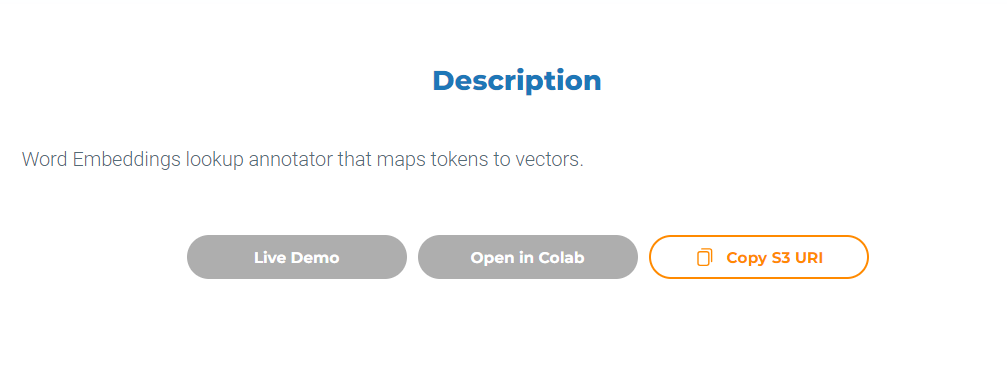

In [57]:
link = "s3://auxdata.johnsnowlabs.com/clinical/models/ner_jsl_en_4.2.0_3.0_1666181370373.zip"
ResourceDownloader.downloadModelDirectly(link, "clinical/models") 

link = "s3://auxdata.johnsnowlabs.com/clinical/models/embeddings_clinical_en_2.4.0_2.4_1580237286004.zip"
ResourceDownloader.downloadModelDirectly(link "clinical/models") 


In [58]:
# or simply put the model name below:

model_name = "ner_clinical_large"
from sparknlp_jsl.updateModels import UpdateModels
UpdateModels.updateModels([model_name, "ner_jsl"])

### Download via InternalResourceDownloader method

In [83]:
# very similar to ResourceDownloader method you can use InternalResourceDownloader as below and specify where to download
from sparknlp_jsl.pretrained import InternalResourceDownloader

InternalResourceDownloader.downloadModelDirectly("clinical/models/embeddings_clinical_en_2.4.0_2.4_1580237286004.zip", "clinical/models", cache_folder_path="TESTFOLDER")  
InternalResourceDownloader.downloadModelDirectly("clinical/models/ner_clinical_large_en_3.0.0_3.0_1617206114650.zip", "clinical/models", cache_folder_path="TESTFOLDER")

In [45]:
WordEmbeddingsPath =  "cache_pretrained/embeddings_clinical_en_2.4.0_2.4_1580237286004"
NerModelPath = "cache_pretrained/ner_clinical_large_en_3.0.0_3.0_1617206114650"

`let's test the downloaded models`

In [ ]:
# Annotator that transforms a text column from dataframe into an Annotation ready for NLP
documentAssembler = DocumentAssembler()\
    .setInputCol("text")\
    .setOutputCol("document")
        
sentenceDetector = SentenceDetector()\
    .setInputCols(["document"])\
    .setOutputCol("sentence")
 
# Tokenizer splits words in a relevant format for NLP
tokenizer = Tokenizer()\
    .setInputCols(["sentence"])\
    .setOutputCol("token")

# Clinical word embeddings trained on PubMED dataset
word_embeddings = WordEmbeddingsModel.load(WordEmbeddingsPath)\
    .setInputCols(["sentence", "token"])\
    .setOutputCol("embeddings")

# NER model trained on i2b2 (sampled from MIMIC) dataset
jsl_ner = MedicalNerModel.load(NerModelPath) \
    .setInputCols(["sentence", "token", "embeddings"]) \
    .setOutputCol("ner")\
    .setLabelCasing("upper") #decide if we want to return the tags in upper or lower case 

ner_converter = NerConverter()\
    .setInputCols(["sentence","token","ner"])\
    .setOutputCol("ner_chunk")

nlpPipeline = Pipeline(stages=[
        documentAssembler,
        sentenceDetector,
        tokenizer,
        word_embeddings,
        jsl_ner,
        ner_converter])

empty_data = spark.createDataFrame([[""]]).toDF("text")

model = nlpPipeline.fit(empty_data)

In [47]:
# fullAnnotate in LightPipeline

text = '''
A 28-year-old female with a history of gestational diabetes mellitus diagnosed eight years prior to presentation and subsequent type two diabetes mellitus ( T2DM ), one prior episode of HTG-induced pancreatitis three years prior to presentation , and associated with an acute hepatitis , presented with a one-week history of polyuria , poor appetite , and vomiting . 
She was on metformin , glipizide , and dapagliflozin for T2DM and atorvastatin and gemfibrozil for HTG . She had been on dapagliflozin for six months at the time of presentation . 
Physical examination on presentation was significant for dry oral mucosa ; significantly , her abdominal examination was benign with no tenderness , guarding , or rigidity . Pertinent laboratory findings on admission were : serum glucose 111 mg/dl ,  creatinine 0.4 mg/dL , triglycerides 508 mg/dL , total cholesterol 122 mg/dL , and venous pH 7.27 . 
'''
print (text)

light_model = LightPipeline(model)

light_result = light_model.fullAnnotate(text)

chunks = []
entities = []
sentence= []
begin = []
end = []
confidence = []

for n in light_result[0]['ner_chunk']:
        
    begin.append(n.begin)
    end.append(n.end)
    chunks.append(n.result)
    entities.append(n.metadata['entity']) 
    sentence.append(n.metadata['sentence'])
    confidence.append(n.metadata['confidence'])
    
import pandas as pd

df_clinical = pd.DataFrame({'chunks':chunks, 
                            'begin': begin, 
                            'end':end, 
                            'sentence_id':sentence, 
                            'entities':entities,
                            'confidence':confidence})

df_clinical.head(5)


A 28-year-old female with a history of gestational diabetes mellitus diagnosed eight years prior to presentation and subsequent type two diabetes mellitus ( T2DM ), one prior episode of HTG-induced pancreatitis three years prior to presentation , and associated with an acute hepatitis , presented with a one-week history of polyuria , poor appetite , and vomiting . 
She was on metformin , glipizide , and dapagliflozin for T2DM and atorvastatin and gemfibrozil for HTG . She had been on dapagliflozin for six months at the time of presentation . 
Physical examination on presentation was significant for dry oral mucosa ; significantly , her abdominal examination was benign with no tenderness , guarding , or rigidity . Pertinent laboratory findings on admission were : serum glucose 111 mg/dl ,  creatinine 0.4 mg/dL , triglycerides 508 mg/dL , total cholesterol 122 mg/dL , and venous pH 7.27 . 



,chunks,begin,end,sentence_id,entities,confidence
0,gestational diabetes mellitus,40,68,0,PROBLEM,0.91976666
1,subsequent type two diabetes mellitus,118,154,0,PROBLEM,0.75924003
2,T2DM,158,161,0,PROBLEM,0.9917
3,HTG-induced pancreatitis,187,210,0,PROBLEM,0.97535
4,an acute hepatitis,268,285,0,PROBLEM,0.9440667
